# Nivell 1
## Exercici 1
#### Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [183]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_delay_flights = pd.read_csv('C:/Users/xizes/DelayedFlights.csv')

In [13]:
pd.set_option('display.max_columns', None)
df_delay_flights.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [12]:
df_delay_flights.shape

(1936758, 30)

In [9]:
df_delay_flights.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [14]:
#Feature selection (X) and target selection (y)
X = df_delay_flights.drop(columns=['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'CRSElapsedTime', 'ArrDelay',
       'Origin', 'Dest',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])
y = df_delay_flights['ArrDelay']

In [17]:
#Split features and target into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [194]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1355730, 6)
X_test shape: (581028, 6)
y_train shape: (1355730,)
y_test shape: (581028,)


# Nivell 2
## Exercici 2
#### Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [161]:
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler, MinMaxScaler

**Standardize selected features using Robust Scaler in order to exclude the outliers**

In [136]:
robust_scaler = RobustScaler()

In [137]:
X_rob_scaled = robust_scaler.fit_transform(X)

In [141]:
X_rob_scaled[0:5]

array([[ 0.14117647,  0.32911392, -0.3902439 ,  0.30909091, -0.5       ,
        -0.54545455],
       [ 0.14117647,  0.29113924, -0.12195122,  0.30909091, -0.25      ,
        -0.36363636],
       [-0.23529412, -0.17721519, -0.3902439 , -0.13787879, -0.75      ,
         0.27272727],
       [-0.30588235, -0.16455696,  0.24390244, -0.13787879, -0.75      ,
        -0.36363636],
       [-0.17647059, -0.03797468,  0.02439024,  0.12424242, -0.5       ,
        -0.36363636]])

**Create dummies columns for Carriers**

In [71]:
df_carriers_dummies = pd.get_dummies(df_delay_flights['UniqueCarrier'])

In [74]:
df_carriers_dummies.head()

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1936754,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1936755,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1936756,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


**Polynomial Featuring**

In [143]:
poly = PolynomialFeatures()

In [144]:
X_poly = poly.fit_transform(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [153]:
#Check for NaN values in the 'X' df
X.isnull().sum()

ActualElapsedTime    8387
AirTime              8387
DepDelay                0
Distance                0
TaxiIn               7110
TaxiOut               455
dtype: int64

In [154]:
#Drop all NaN values
X.dropna(inplace=True)

In [155]:
#Confirm NaN values were droped
X.isnull().sum()

ActualElapsedTime    0
AirTime              0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
dtype: int64

In [156]:
#Run the Polynomial fit_transform again
X_poly = poly.fit_transform(X)

In [157]:
X_poly[0:5]

array([[1.00000e+00, 1.28000e+02, 1.16000e+02, 8.00000e+00, 8.10000e+02,
        4.00000e+00, 8.00000e+00, 1.63840e+04, 1.48480e+04, 1.02400e+03,
        1.03680e+05, 5.12000e+02, 1.02400e+03, 1.34560e+04, 9.28000e+02,
        9.39600e+04, 4.64000e+02, 9.28000e+02, 6.40000e+01, 6.48000e+03,
        3.20000e+01, 6.40000e+01, 6.56100e+05, 3.24000e+03, 6.48000e+03,
        1.60000e+01, 3.20000e+01, 6.40000e+01],
       [1.00000e+00, 1.28000e+02, 1.13000e+02, 1.90000e+01, 8.10000e+02,
        5.00000e+00, 1.00000e+01, 1.63840e+04, 1.44640e+04, 2.43200e+03,
        1.03680e+05, 6.40000e+02, 1.28000e+03, 1.27690e+04, 2.14700e+03,
        9.15300e+04, 5.65000e+02, 1.13000e+03, 3.61000e+02, 1.53900e+04,
        9.50000e+01, 1.90000e+02, 6.56100e+05, 4.05000e+03, 8.10000e+03,
        2.50000e+01, 5.00000e+01, 1.00000e+02],
       [1.00000e+00, 9.60000e+01, 7.60000e+01, 8.00000e+00, 5.15000e+02,
        3.00000e+00, 1.70000e+01, 9.21600e+03, 7.29600e+03, 7.68000e+02,
        4.94400e+04, 2.88000

**Standardize selected features using StandardScaler and MinMaxScaler**

In [162]:
scaler_std = StandardScaler()

In [163]:
X_std_scaled = scaler_std.fit_transform(X)

In [164]:
X_std_scaled[0:5]

array([[-0.07363114,  0.11250817, -0.65880113,  0.07850241, -0.53366771,
        -0.71408012],
       [-0.07363114,  0.06880353, -0.45229036,  0.07850241, -0.34384414,
        -0.57430187],
       [-0.51770521, -0.4702204 , -0.65880113, -0.4355373 , -0.72349129,
        -0.08507799],
       [-0.6009691 , -0.45565219, -0.17068477, -0.4355373 , -0.72349129,
        -0.57430187],
       [-0.44831863, -0.30997004, -0.33964813, -0.13408351, -0.53366771,
        -0.57430187]])

In [160]:
scaler_minmax = MinMaxScaler()

In [165]:
X_minmax_scaled = scaler_minmax.fit_transform(X)

In [166]:
X_minmax_scaled[0:5]

array([[0.10363636, 0.10632447, 0.00081268, 0.16138154, 0.01666667,
        0.01895735],
       [0.10363636, 0.1035747 , 0.00528241, 0.16138154, 0.02083333,
        0.02369668],
       [0.07454545, 0.06966086, 0.00081268, 0.10179762, 0.0125    ,
        0.04028436],
       [0.06909091, 0.07057745, 0.01137749, 0.10179762, 0.0125    ,
        0.02369668],
       [0.07909091, 0.07974335, 0.00772044, 0.13674005, 0.01666667,
        0.02369668]])

# Nivell 3
## Exercici 3
#### Resumeix les noves columnes generades de manera estadística i gràfica

In [179]:
#Number of flights per carrier
df_carriers_dummies.sum().sort_values()

AQ       750
HA      7490
F9     28269
AS     39293
9E     51885
OH     52657
B6     55315
YV     67063
FL     71284
NW     79108
EV     81877
US     98425
CO    100195
XE    103663
DL    114238
OO    132433
UA    141426
MQ    141920
AA    191865
WN    377602
dtype: int64

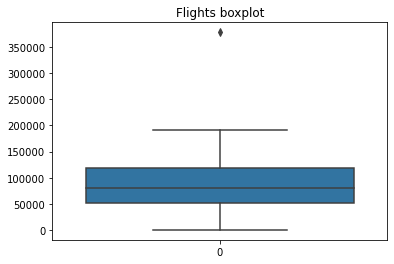

In [193]:
#Total flights boxplot
flights_boxplot = sns.boxplot(data=df_carriers_dummies.sum().sort_values())
flights_boxplot.set(title='Flights boxplot')
plt.show()

In [197]:
#Change format to float instead of scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Compare train and test sets statistically
X_train.describe()

,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
count,1349812.000,1349812.000,1355730.000,1355730.000,1350703.000,1355405.000
mean,133.336,108.309,43.182,765.877,6.814,18.230
std,72.096,68.674,53.420,574.622,5.274,14.332
min,14.000,0.000,6.000,11.000,0.000,0.000
25%,80.000,58.000,12.000,338.000,4.000,10.000
50%,116.000,90.000,24.000,606.000,6.000,14.000
75%,165.000,137.000,53.000,998.000,8.000,21.000
max,1114.000,1091.000,2467.000,4962.000,240.000,422.000


In [198]:
X_test.describe()

,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
count,578559.000,578559.000,581028.000,581028.000,578945.000,580898.000
mean,133.236,108.203,43.193,765.240,6.811,18.237
std,71.977,68.570,53.363,574.147,5.273,14.354
min,16.000,0.000,6.000,30.000,0.000,0.000
25%,80.000,58.000,12.000,338.000,4.000,10.000
50%,116.000,90.000,24.000,606.000,6.000,14.000
75%,165.000,137.000,53.000,998.000,8.000,21.000
max,750.000,664.000,1952.000,4962.000,200.000,393.000


In [199]:
#Compare train and test sets inner correlations
X_train.corr()

,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
ActualElapsedTime,1.000,0.977,0.019,0.953,0.166,0.290
AirTime,0.977,1.000,-0.002,0.980,0.084,0.091
DepDelay,0.019,-0.002,1.000,-0.007,0.074,0.080
Distance,0.953,0.980,-0.007,1.000,0.072,0.071
TaxiIn,0.166,0.084,0.074,0.072,1.000,0.067
TaxiOut,0.290,0.091,0.080,0.071,0.067,1.000


In [200]:
X_test.corr()

,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
ActualElapsedTime,1.000,0.977,0.016,0.953,0.167,0.289
AirTime,0.977,1.000,-0.005,0.980,0.085,0.089
DepDelay,0.016,-0.005,1.000,-0.010,0.077,0.076
Distance,0.953,0.980,-0.010,1.000,0.073,0.068
TaxiIn,0.167,0.085,0.077,0.073,1.000,0.067
TaxiOut,0.289,0.089,0.076,0.068,0.067,1.000


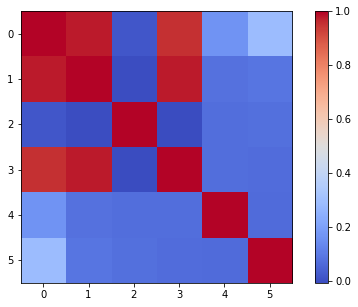

In [203]:
#X_train correlation heatmap
plt.figure(figsize=(8, 5))
plt.imshow(X_train.corr(), cmap='coolwarm')
plt.colorbar()
plt.show()

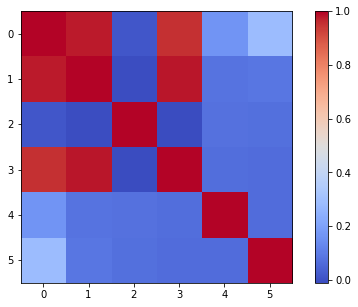

In [204]:
#X_test correlation heatmap
plt.figure(figsize=(8, 5))
plt.imshow(X_test.corr(), cmap='coolwarm')
plt.colorbar()
plt.show()

<ipython-input-205-3222a23dbf1f>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


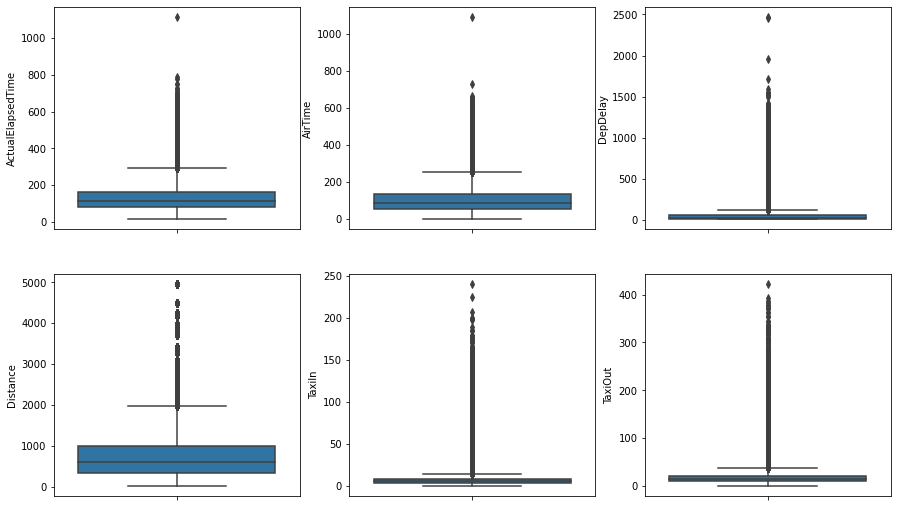

In [205]:
#Check outliers for the features selected
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
sns.boxplot(data=X, y=X.columns[0], ax=ax[0, 0])
sns.boxplot(data=X, y=X.columns[1], ax=ax[0, 1])
sns.boxplot(data=X, y=X.columns[2], ax=ax[0, 2])
sns.boxplot(data=X, y=X.columns[3], ax=ax[1, 0])
sns.boxplot(data=X, y=X.columns[4], ax=ax[1, 1])
sns.boxplot(data=X, y=X.columns[5], ax=ax[1, 2])
fig.show()